In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random 
import torch
from torch.autograd import Variable


In [2]:
images=np.load('data/images.npy')
labels=np.load('data/labels.npy')
labels=labels.astype(int)
labels[labels!=0]=-1
labels[labels==0]=1
labels[labels==-1]=0


### Number of apples in the test set = 10000

10000


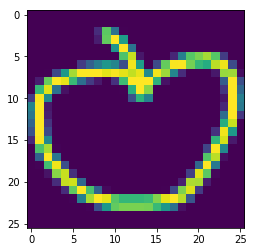

In [3]:
apples=images[labels==1]
print(len(apples))
plt.imshow(apples[0])


## Flattening the image

In [4]:
shape_images_flat=(images.shape[0],images.shape[1]*images.shape[2])
images_flat=np.ndarray(shape=shape_images_flat)
for index in range(len(images)):
    images_flat[index]=images[index].flat
images=images_flat


In [5]:
images_len=len(images)
shuffler_list=list(range(0, images_len))
# print(list)
# random.shuffle(shuffler_list)

In [6]:
shuffled_images=images[shuffler_list]
shuffled_labels=labels[shuffler_list]


In [7]:
train_images=shuffled_images[0:40000]
train_labels=shuffled_labels[0:40000]

validation_images=shuffled_images[40000:45000]
validation_labels=shuffled_labels[40000:45000]

test_images=shuffled_images[45000:50000]
test_labels=shuffled_labels[45000:50000]

# Random coin flipping accuracy
Random coin flipping gives us:
1. Correct prediction Probabilty=0.5 if apple
2. Correct prediction Probabilty=0.5 if not apple

Probabilty of apple=0.2

Probabilty of not apple=0.8

Overall correct clasification probabilty =0.5 x 0.2 + 0.5 x 0.8

Overall accuracy thus is=0.5

# Majority Classifier accuracy
We always predict not apple in this case

Probabilty of not apple=0.8

Thus, majority classifer accuracy=0.8


In [8]:
def accuracy(y, y_hat):
    """Compute accuracy.
    Args:
    y: A 1-D int NumPy array.
    y_hat: A 1-D int NumPy array.
    Returns:
    A float, the fraction of time y[i] == y_hat[i].
    """
    return (y == y_hat).astype(np.float).mean()

In [70]:
# train_labels[train_labels==0]=1
# train_labels[train_labels!=0]=-1
# X = torch.from_numpy(train_images)
# y = torch.from_numpy(train_labels)
X=train_images
y=train_labels

SyntaxError: unexpected EOF while parsing (<ipython-input-70-c92c7eaeb793>, line 9)

In [71]:
def sign(num):
    check = Variable(torch.Tensor([0.0]).double().expand(num.size()))
    return torch.ge(num,check).double()

In [33]:
total_epochs=3
learning_rate=0.001
Y=train_labels

In [73]:
X=train_images
Y=train_labels
W_tensor=torch.torch.DoubleTensor(1,X.shape[1]).zero_()
print(W_tensor.shape)

W_tensor=Variable(W_tensor,requires_grad=True)
X_tensor=Variable(torch.from_numpy(X))
Y_tensor=Variable(torch.from_numpy(Y.astype(float)))
for epoch in range(0,total_epochs):
#     for i in range(0,X.shape[0]):
    for i in range(0,1):

        w_x = X_tensor[i].view(1,-1).mm(W_tensor.t())
        y_hat = sign(w_x)
        loss = (Y_tensor[i] - y_hat )
        J = loss* y_pred 
        loss.backward()
        W_tensor.data -= learning_rate * W_tensor.grad.data

        
weights_overall=W_tensor.data.numpy()
print(weights_overall.shape)


torch.Size([1, 676])


RuntimeError: there are no graph nodes that require computing gradients

In [67]:
print(weights_overall)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0. 

In [64]:
X=train_images
y=train_labels
d=X.dot(weights_overall)
d[d>0]=1
d[d<=0]=0
ac=accuracy(y,d)
print(ac)


0.800175


In [54]:
print(y)


[0 1 1 ..., 1 0 0]
